# Подключение необходимых библиотек

In [911]:
import numpy as np
from numpy.random import uniform
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

# Задание 1
Задана плотность распределения вероятностей некоторой случайной величины:
 f(x) = (2+cosx)/4pi I(0 ≤ x ≤ 2pi), где I(x ∈ A) = 1, если x ∈ A и нуль иначе. Сгенерировать выборку из данного распределения. На основе сгенерированной выборки проверить гипотезу согласия с заданным распределением.

In [ ]:
n = 10000    # Размер выборки

# По условию интревал I(0 ≤ x ≤ 2pi)
a = 0
b = 2 * np.pi

# Максимум функции плотности распределения = 3 / (4 * pi)
M = 3 / (4 * np.pi)

result = []

In [913]:
# Функция плотности распределения f(x)
def f(x):
    return ((2 + np.cos(x)) / (4 * np.pi)) * (a <= x) * (x <= b)

# Интеграл функции плотности распределения = функция распределения
def F(x):
    return (np.sin(x) + 2*x) / (4 * np.pi) * (a <= x) * (x <= b)

In [914]:
# Метод Неймана
while len(result) < n:
    x1 = a + (b - a) * uniform()   # uniform - непрерывная случайная величина с равномерным распределение (по умолчанию [0, 1])
    x2 = M * uniform()
    if x2 <= f(x1):
        result.append(x1)

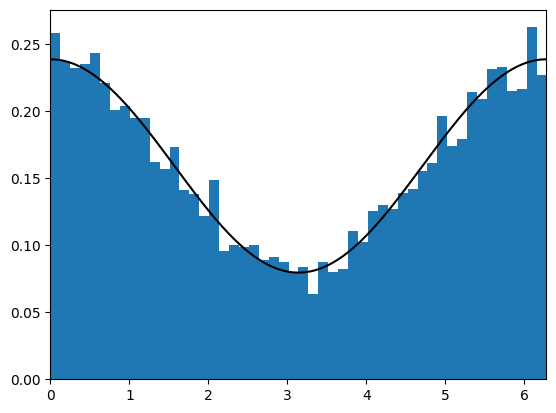

In [915]:
# Параметры графика плотности
x = np.linspace(a, b, n)   # В диапазоне [a, b], n=1000
y = f(x)

plt.plot(x, y, color='black')                 # График плотности
plt.hist(result, bins = 50, density = True)   # График с результатами 
# density=True нормализует гистограмму, чтобы её площадь была равна 1

plt.xlim(a, b)
plt.show()

## Проверка гипотезы для задания 1.1
Критерий Колмагоров-Смирнов

In [916]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(result, F)

print(f"p-value: {p_value}")
if p_value >= 0.05:
    print("Нет оснований отвергать нулевую гипотезу: распределение согласуется с заданным.")
else:
    print("Нулевая гипотеза отвергается: распределение не согласуется с заданным.")

p-value: 0.805609440033898
Нет оснований отвергать нулевую гипотезу: распределение согласуется с заданным.


# Задание 1.2 Генерация многомерного нормального распределения
Пусть случайный вектор X = (X1, ..., Xn) имеет многомерное нормальное
распределение N() (вектор средних и матрица ковариаций заданы).
На основе сгенерированной выборки найти оценку матрицы ковариаций
и проверить гипотезу о равенстве коэффициента корреляции Cor(Xi, Xj)
(для фиксированных индексов i, j = 1..n) требуемому значению.

In [917]:
def generate_multivariate_normal(mean, cov, sample_size):
    # Разложение Холецкого для ковариационной матрицы
    # Получаю нижнюю треугольную матрицу C, такую что C @ C.T = cov
    C = np.linalg.cholesky(cov)
    
    # Генерация стандартных нормальных величин (N(0, 1))
    # Матрица размера sample_size=1000 x len(mean)
    Y = np.random.normal(size=(sample_size, len(mean)))  

    # Преобразование стандартных нормальных величин в многомерные нормальные с заданным средним и ковариацией
    # X = Y * C.T + mean, где C.T - транспонированная матрица C
    X = Y @ C.T + mean
    return X

In [918]:
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Параметры для многомерного нормального распределения
mean = np.array([0, 0])                # Вектор средних значение (математическое ожидание)
cov_matrix = np.array([[1, 0.5],       # Матрица ковариаций
                     [0.5, 1]])
n_sample = 10000

# sample = np.random.multivariate_normal(mean, cov_matrix, n_sample)  # Генерация выборки из многомерного нормального распределения
sample = generate_multivariate_normal(mean, cov_matrix, n_sample)

In [919]:
# Вычисляется выборочная матрица ковариаций для сгенерированных данных 
# Это нужно, чтобы убедиться, что выборочная матрица ковариаций близка к теоретической ([1 0,5], [0,5 1])
cov_estimate = np.cov(sample, rowvar=False)
print("Оценка матрицы ковариаций:\n", cov_estimate)

Оценка матрицы ковариаций:
 [[1.01418642 0.49863622]
 [0.49863622 1.00543642]]


In [920]:
i, j = 0, 1
# Вычисление коэффициента корреляции Пирсона и p-value между X1 (столбик 0) и X2 (столбик 1)
corr_coef, p_value = pearsonr(sample[:, i], sample[:, j])
print(f"Коэффициент корреляции между X1 и X2: {corr_coef}")

Коэффициент корреляции между X1 и X2: 0.49379606062849113


In [921]:
# Z-преобразование Фишера используется для стабилизации дисперсии коэффициента корреляции
# Это преобразование позволяет работать с коэффициентом корреляции как с нормально распределенной величиной

rho_0 = cov_matrix[0,1]/np.sqrt(cov_matrix[0,0]*cov_matrix[1,1])      # Теоретический коэффициент корреляции
z = 0.5 * np.log((1 + corr_coef) / (1 - corr_coef))                   # Z-преобразование Фишера к выборочному коэф. корреляции 
z_0 = 0.5 * np.log((1 + rho_0) / (1 - rho_0))                         # Z-преобразование Фишера к теоретическому коэф. корреляции
se = 1 / np.sqrt(n_sample - 3)                                        # Cтандартная ошибка для z-преобразования

# z-статистика, используемая для проверки гипотезы о равенстве выборочного и теоретического коэффициентов корреляции
z_stat = (z - z_0) / se                               
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))

print("p-value для проверки гипотезы:", p_value)
if p_value >= 0.05:
    print("Нет оснований отвергать нулевую гипотезу: коэффициент корреляции незначительно отличается от 0.5")
else:
    print("Отвергаем нулевую гипотезу: коэффициент корреляции значительно отличается от 0.5")

p-value для проверки гипотезы: 0.4101215022927054
Нет оснований отвергать нулевую гипотезу: коэффициент корреляции незначительно отличается от 0.5


# Задание 2
Заданы координаты вершин двух треугольников (на плоскости). С помощью метода Монте-Карло вычислить площадь их пересечения.

In [922]:
def sign(p1, p2, p3):
    return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

In [923]:
# Функция проверяет принадлежит ли точка p треугольнику с вершинами a, b, c
def point_in_triangle(p, a, b, c):
    d1 = sign(a, b, p)
    d2 = sign(b, c, p)
    d3 = sign(c, a, p)

    has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
    has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)

    return not (has_neg and has_pos)

In [924]:
def monte_carlo_area(triangle1, triangle2, num_points=100000):
    # Границы прямоугольника, который включает в себя оба треугольника
    all_points = triangle1 + triangle2
    x_coords = [p[0] for p in all_points]
    y_coords = [p[1] for p in all_points]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    print("x_min = ", x_min)
    print("y_min = ", y_min)
    print("x_max = ", x_max)
    print("y_max = ", y_max)

    # Площадь прямоугольника
    rect_area = (x_max - x_min) * (y_max - y_min)
    
    # Генерация случайных точек
    M = 0
    for _ in range(num_points):
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)
        p = (x, y)
        if point_in_triangle(p, triangle1[0], triangle1[1], triangle1[2]) and point_in_triangle(p, triangle2[0], triangle2[1], triangle2[2]):
            M += 1
    
    # Площадь пересечения
    intersection_area = (M / num_points) * rect_area
    return intersection_area

In [925]:
# Пример использования
triangle1 = [(0, 0), (2, 0), (1, 2)]
triangle2 = [(1, 0), (3, 0), (2, 2)]

area = monte_carlo_area(triangle1, triangle2)
print(f"Площадь пересечения: {area}")

x_min =  0
y_min =  0
x_max =  3
y_max =  2
Площадь пересечения: 0.50046


# Задание 3

Портфель ценных бумаг

In [ ]:
import numpy as np

# Параметры
m = 5         # Количество видов ценных бумаг
n = 1000      # Количество сценариев
T = 1         # Временной горизонт (общее время)
alpha = 0.05  # Уровень доверия

# Параметры для каждой ценной бумаги
S0 = np.random.rand(m)              # Начальная стоимость
mu = np.random.rand(m)              # Ожидаемая доходность каждой ценной бумаг
sigma = np.random.rand(m)           # Изменчивость в цене каждой ценной бумаги
n_i = np.random.randint(1, 10, m)   # Количество единиц каждой ценной бумаги в портфеле


In [927]:
# Моделирование стоимости портфеля
Z = np.random.normal(0, 1, (n, m))
S_T = S0 * np.exp((mu - sigma**2 / 2) * T + sigma * np.sqrt(T) * Z)   # Моделирование конечной стоимости ценных бумаг
V_T = np.dot(S_T, n)                                                  # Стоимость портфеля в момент времени T для каждого сценария
L_T = np.sum(n_i * S0) - V_T                                          # Потери портфеля (разница между начальной и конечной стоимостью)

# Вычисление VaR (Value at Risk)
VaR = np.percentile(L_T, 100 * (1 - alpha))
print(f"VaR на уровне {1 - alpha:.0%}: {VaR:.2f}")

VaR на уровне 95%: -76.39


# Задание 4

В области A, представляющей собой бесконечный слой (на плоскости) вакуума толщиной D м, было одновременно испущено N+1 фотонов, где N– случайная величина, имеющая распределение Пуассона с параметром = 2. Предполагается, что точки излучения расположены на одной прямой и их распределение по толщине D равномерное, а распределение направлений излучения фотонов изотропное. С каждой из двух сторон расположен детектор в виде бесконечной полосы. При попадании в детектор фотон поглощается. Детекторы включены в схему совпадений, которая срабатывает в том случае, если промежуток времени между попаданиями фотонов в детекторы не превышает t = 3·10−8 с.
Скорость света в вакууме C = 3 · 108 м/с. Вычислить вероятность того, что схема сработала.


In [928]:
# Входные данные
D = 1.0              # Толщина слоя (в метрах). В задаче не было конкретного значения
lambda_poisson = 2   # Параметр распределения Пуассона
C = 3e8              # Скорость света (м/с)
delta_t = 3e-8       # Максимальный промежуток времени для срабатывания схемы (с)
num_trials = 10000  # Количество испытаний для метода Монте-Карло

In [929]:
# Функция для моделирования одного испытания
def simulate_trial():
    N = np.random.poisson(lambda_poisson)   # N - случайная величина, имеющая распределение Пуассона с параметром lambda_poisson=2
    num_photons = N + 1                     # Количество фотонов N + 1
    
    # Генерация позиций и направлений фотонов
    x_positions = np.random.uniform(0, D, num_photons)     # Равномерное распределение по толщине слоя (= положение фотонов)
    angles = np.random.uniform(0, np.pi, num_photons)      # Изотропное распределение направлений (Направление фотонов от 0 до pi)
    
    # Вычисление времени полета до детекторов
    time = np.where(angles < np.pi / 2,
                   x_positions / (C * np.cos(angles)),
                   (D - x_positions) / (C * np.cos(np.pi - angles)))
    
    # Объединяю времена и углы в один массив
    time_angles = np.column_stack((time, angles))
    # Сортируем по времени (по первому столбцу)
    time_angles_sorted = time_angles[time_angles[:, 0].argsort()]

    # Разделяю отсортированные времена и углы
    time_sorted = time_angles_sorted[:, 0]
    angles_sorted = time_angles_sorted[:, 1]

    # Проверка, есть ли два фотона, попавшие в разные детекторы с интервалом <= delta_t
    for i in range(len(time_sorted) - 1):
        if (time_sorted[i + 1] - time_sorted[i]) <= delta_t:
            # Проверяем, что фотоны попали в разные детекторы
            if (angles_sorted[i] < np.pi / 2 and angles_sorted[i + 1] >= np.pi / 2) or (angles_sorted[i] >= np.pi / 2 and angles_sorted[i + 1] < np.pi / 2):
                return 1  # Схема сработала
    return 0              # Схема не сработала

In [930]:
# Основной цикл метода Монте-Карло
success_count = 0
for i in range(num_trials):
    if simulate_trial():
        success_count += 1

In [931]:
# Оценка вероятности срабатывания схемы
probability = success_count / num_trials
print(f"Вероятность срабатывания схемы: {probability:.6f}")

Вероятность срабатывания схемы: 0.615200


# Задание 5
Реализовать алгоритм генерации точек, равномерно распределенных на поверхности геликоида:
0 ≤ uv ≤2, 
x = ucosv, 
y = usinv,
z = v,

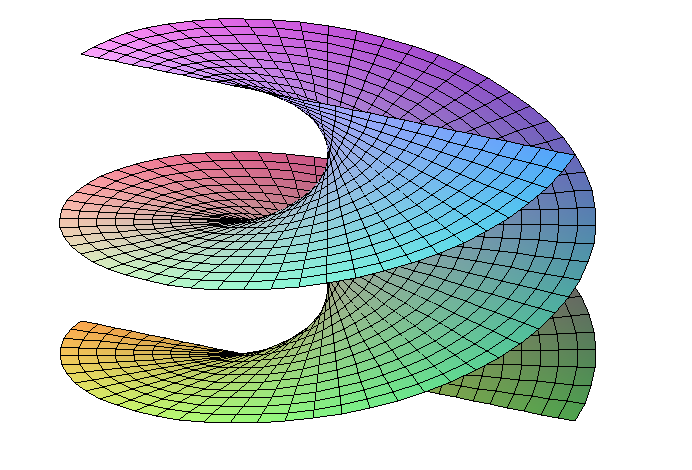

In [932]:
from scipy.integrate import quad
# Параметры геликоида
u_min = 0
u_max = 2 * np.pi

v_min = 0
v_max = 2 * np.pi

M = np.sqrt((2 * np.pi)**2 + 1)

In [933]:
# Плотность
def fu(u):
    integral_value, _ = quad(lambda u: np.sqrt(u**2 + 1), 0, 2 * np.pi)
    return np.sqrt(u**2 + 1) / integral_value       

In [934]:
# Метод Неймана для выборки u
def sample_u(n):
    u_samples = []
    while len(u_samples) < n:
        x1 = 2 * np.pi * np.random.uniform()
        x2 = M * np.random.uniform()
        if x2 < fu(x1):
            u_samples.append(x1)
    return np.array(u_samples)

# x1 = a + (b - a) * uniform() a = 0, b = 2*pi => 0 + (2pi - 0) = 2pi
# x2 = M * uniform()

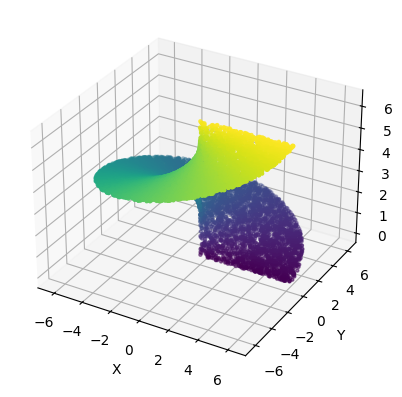

In [935]:
# Генерация точек
num_points = 10000

u_samples = sample_u(num_points)
v_samples = np.random.uniform(v_min, v_max, num_points)


x = u_samples * np.cos(v_samples)
y = u_samples * np.sin(v_samples)
z = v_samples

# Визуализация
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()